In [17]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('SampleSuperstore.csv', encoding='ISO-8859-1')

In [18]:
# Quick look at the data

print(df.head())
print(df.info())
print(df.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [4]:
#Finding what are the total Sales and Total Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print(f"Total Sales: ${total_sales}")
print(f"Total Profit: ${total_profit}")

Total Sales: $2297200.8603
Total Profit: $286397.0217


In [5]:
#Identify the Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [6]:
#Top Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


Matplotlib is building the font cache; this may take a moment.


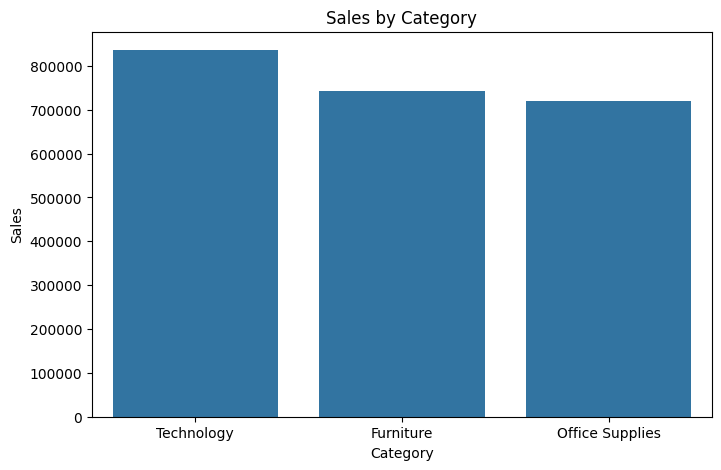

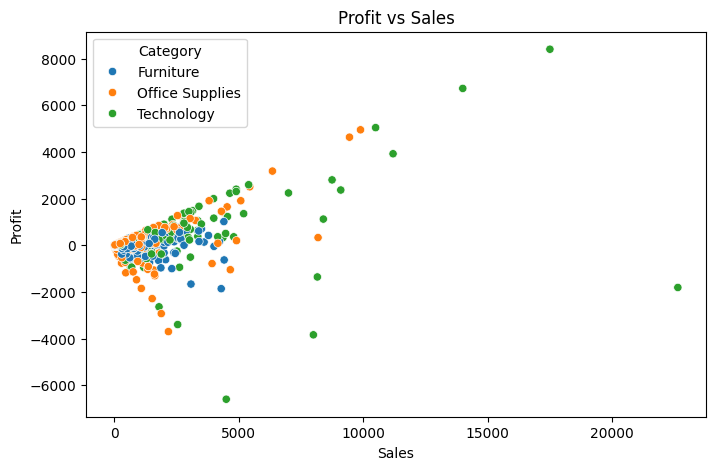

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.show()

# Profit vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Profit vs Sales')
plt.show()


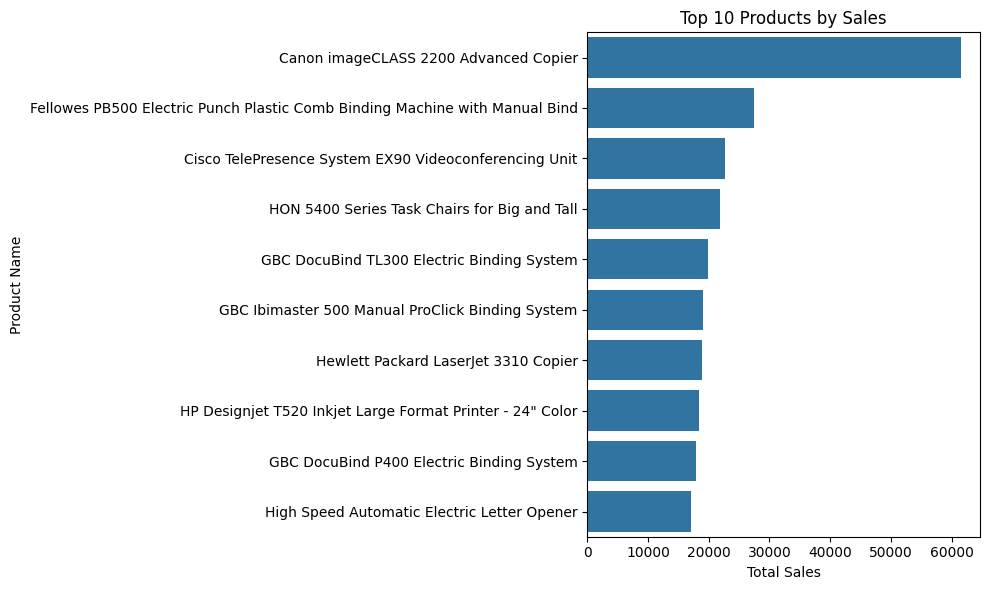

In [19]:
#Top 10 products by Sales

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

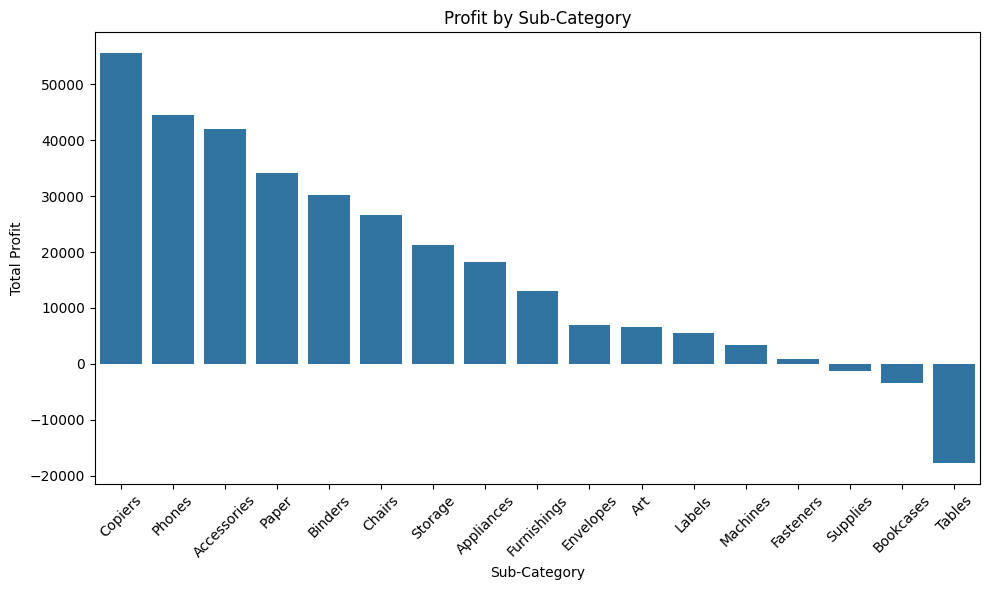

In [20]:
#Profit by Sub-Category

subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=subcat_profit.index, y=subcat_profit.values)
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

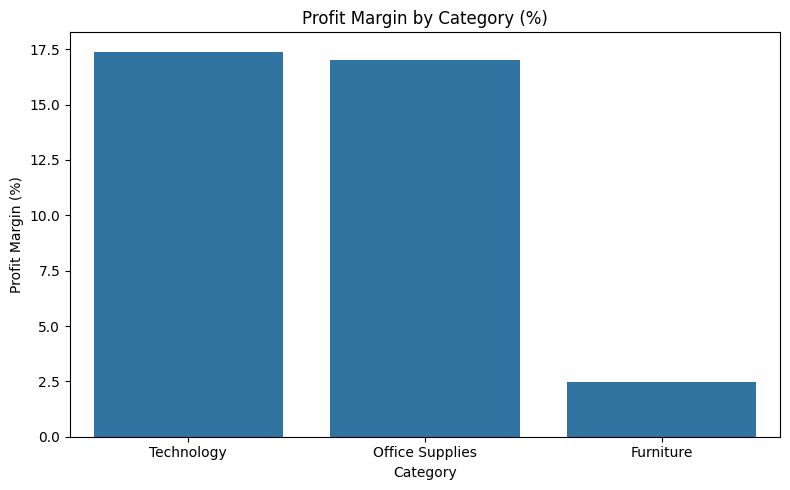

In [14]:
#Profit Margin by Category (Advanced Visual)
category_margin = (df.groupby('Category')[['Sales','Profit']]
                   .sum()
                   .assign(ProfitMargin=lambda x: x['Profit']/x['Sales']*100)
                   .sort_values('ProfitMargin', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x=category_margin.index, y=category_margin['ProfitMargin'])
plt.title('Profit Margin by Category (%)')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

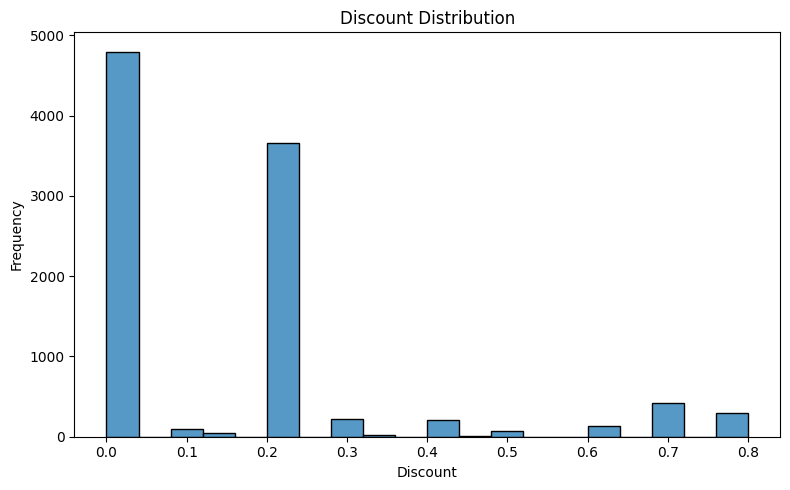

In [13]:
#Discount Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Discount'], bins=20, kde=False)
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()